# CNN Model

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
# import libearies for Deep learning
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Flatten,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Activation,Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator


In [4]:
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

## 1. Import dataset

In [12]:
directory = 'C:/Users/pc/Desktop/PhD/AI Phd/CNN Model/training_set/training_set'
directory2 = 'C:/Users/pc/Desktop/PhD/AI Phd/CNN Model/test_set/test_set'

In [13]:
dataset=[]
mapping={"dogs":0, "cats":1}
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    for im in os.listdir(path):
        if im != '_DS_Store':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(150,150))
            image=img_to_array(image)
            image=image/255.0
            dataset.append([image,count])     
    count=count+1

In [14]:
testset=[]
mapping={"dogs":0, "cats":1}
count=0

for file in os.listdir(directory2):
    path=os.path.join(directory2,file)
    for im in os.listdir(path):
        if im != '_DS_Store':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(150,150))
            image=img_to_array(image)
            image=image/255.0
            testset.append([image,count])         
    count=count+1

In [15]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [16]:
c0=0
c1=0
for i in labels0:
    if i==0:
        c0+=1
    elif i==1:
        c1+=1
print("Total no. of images in dataset are {}".format(len(labels0)))        
print("Number of images of cats: {}\nNumber of images of dogs: {}".format(c0,c1))

Total no. of images in dataset are 8005
Number of images of cats: 4000
Number of images of dogs: 4005


In [17]:
c0=0
c1=0
for i in tlabels0:
    if i==0:
        c0+=1
    elif i==1:
        c1+=1
print("Total no. of images in testset are {}".format(len(tlabels0)))        
print("Number of images of cats: {}\nNumber of images of dogs: {}".format(c0,c1))

Total no. of images in testset are 2023
Number of images of cats: 1011
Number of images of dogs: 1012


In [18]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print("Data Shape:{}\nLabels shape: {}".format(data.shape,labels.shape))

Data Shape:(8005, 150, 150, 3)
Labels shape: (8005, 2)


In [20]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)
print("Test Shape:{}\nTLabels shape: {}".format(test.shape,tlabels.shape))

Test Shape:(2023, 150, 150, 3)
TLabels shape: (2023, 2)


In [21]:
data2=data.reshape(-1,150,150,3)
test2=test.reshape(-1,150,150,3)

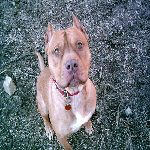

In [19]:
load_img("C:/Users/pc/Desktop/PhD/AI Phd/CNN Model/test_set/test_set/dogs/dog.4025.jpg",target_size=(150,150))

In [22]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [23]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(6404, 150, 150, 3)
(1601, 150, 150, 3)
(6404, 2)
(1601, 2)


## 2. CNN Architecture

In [24]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

In [25]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               21234176  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

## 3. Model Learning

In [26]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)*

Epoch 1/30
201/201 [==============================] - 754s 4s/step - loss: 0.8456 - accuracy: 0.5576 - val_loss: 0.6528 - val_accuracy: 0.5928
Epoch 2/30
201/201 [==============================] - 504s 3s/step - loss: 0.6715 - accuracy: 0.5693 - val_loss: 0.7126 - val_accuracy: 0.5290
Epoch 3/30
201/201 [==============================] - 465s 2s/step - loss: 0.6706 - accuracy: 0.5878 - val_loss: 0.6666 - val_accuracy: 0.6284
Epoch 4/30
201/201 [==============================] - 482s 2s/step - loss: 0.6578 - accuracy: 0.6202 - val_loss: 0.6327 - val_accuracy: 0.6446
Epoch 5/30
201/201 [==============================] - 393s 2s/step - loss: 0.6385 - accuracy: 0.6401 - val_loss: 0.6410 - val_accuracy: 0.6265
Epoch 6/30
201/201 [==============================] - 504s 3s/step - loss: 0.6424 - accuracy: 0.6341 - val_loss: 0.5940 - val_accuracy: 0.6871
Epoch 7/30
201/201 [==============================] - 389s 2s/step - loss: 0.6178 - accuracy: 0.6611 - val_loss: 0.5704 - val_accuracy: 0.7096

## 4. Model Evaluation

In [27]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       796
           1       0.79      0.75      0.77       805

    accuracy                           0.78      1601
   macro avg       0.78      0.78      0.78      1601
weighted avg       0.78      0.78      0.78      1601



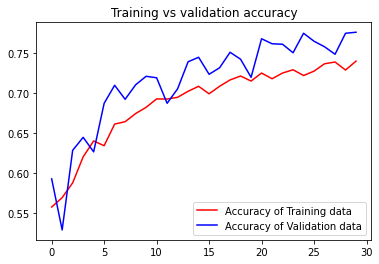

<Figure size 432x288 with 0 Axes>

In [28]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

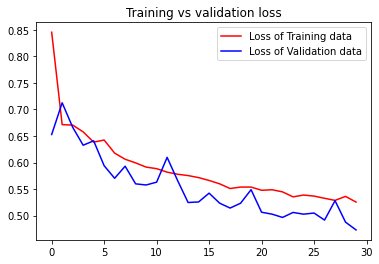

<Figure size 432x288 with 0 Axes>

In [29]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## 5. Model Test 

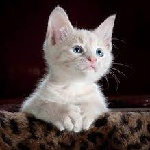

In [47]:
load_img("C:/Users/pc/Desktop/PhD/AI Phd/CNN Model/cat_1.jpg",target_size=(150,150))

In [52]:
image=load_img("C:/Users/pc/Desktop/PhD/AI Phd/CNN Model/cat_1.jpg",target_size=(150,150))
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [53]:
reverse_mapping={1:'dogs',0:'cats'}

def mapper(value):
    return reverse_mapping[value]

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is cats.
